# RTS Smoother

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from filters import RTSSmoother, KalmanFilter
from utils import load_sonar_data

In [8]:
dt, ts, sonar = load_sonar_data()

rtss = RTSSmoother(KalmanFilter(
    A = np.array([1, dt, 0, 1]).reshape(2, 2),
    H = np.array([1, 0]).reshape(1, 2),
    Q = np.array([1, 0, 0, 3]).reshape(2, 2),
    R = np.array([10]).reshape(1, 1),
    x0 = np.array([0, 20]).reshape(2, 1),
    P0 = np.array([20, 0, 0, 20]).reshape(2, 2),
))

In [9]:
rtss.forward(sonar)
xs, Ps = rtss.xs, rtss.Ps
xs2, Ps2 = rtss.backward()

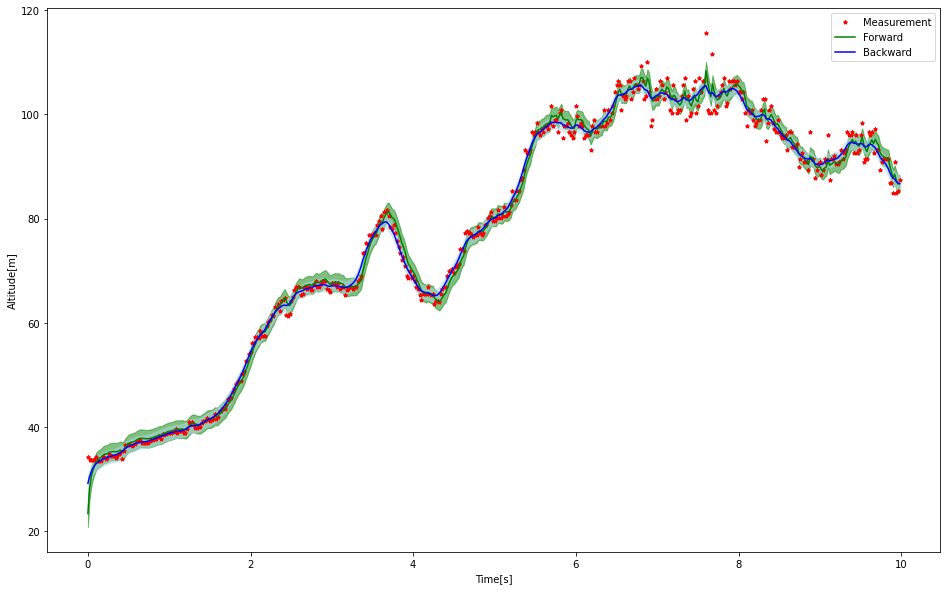

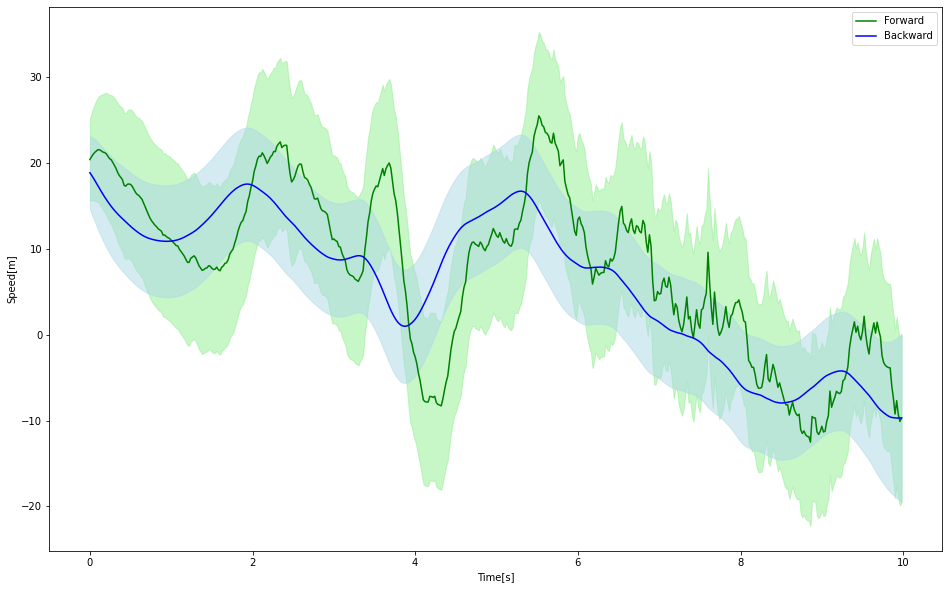

In [21]:
plt.figure(figsize=(16, 10))
plt.fill_between(ts, xs[:, 0, 0] + Ps[:, 0, 0]**0.5, xs[:, 0, 0] - Ps[:, 0, 0]**0.5, color='green', alpha=0.5)
plt.fill_between(ts, xs2[:, 0, 0] + Ps2[:, 0, 0]**0.5, xs2[:, 0, 0] - Ps2[:, 0, 0]**0.5, color='lightblue', alpha=0.5)
plt.plot(ts, sonar, 'r*', label="Measurement", markersize=4)
plt.plot(ts, xs[:, 0], 'g-', label="Forward")
plt.plot(ts, xs2[:, 0], 'b-', label="Backward")
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Altitude[m]')
plt.show()

plt.figure(figsize=(16, 10))
plt.fill_between(ts, xs[:, 1, 0] + Ps[:, 1, 1]**0.5, xs[:, 1, 0] - Ps[:, 1, 1]**0.5, color='lightgreen', alpha=0.5)
plt.fill_between(ts, xs2[:, 1, 0] + Ps2[:, 1, 1]**0.5, xs2[:, 1, 0] - Ps2[:, 1, 1]**0.5, color='lightblue', alpha=0.5)
plt.plot(ts, xs[:, 1], 'g-', label="Forward")
plt.plot(ts, xs2[:, 1], 'b-', label="Backward")
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Speed[m]')
plt.show()